# 查看image与mask

In [1]:
# 导入库
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [2]:
# 导入image与mask路径
imageName = r"D:\FJMU_course\Chapter_6\example_GBM\T1C.nrrd"
maskName = r"D:\FJMU_course\Chapter_6\example_GBM\T1Cseg-label.nrrd"

In [3]:
# 读取图像和掩码
image = sitk.ReadImage(imageName)
mask = sitk.ReadImage(maskName)

# 将SimpleITK图像转换为numpy数组
image_array = sitk.GetArrayFromImage(image)
mask_array = sitk.GetArrayFromImage(mask)

In [4]:
# 选择要显示的切片（这里以中间的切片为例）
slice_idx = image_array.shape[0] // 2
image_slice = image_array[slice_idx, :, :]
mask_slice = mask_array[slice_idx, :, :]

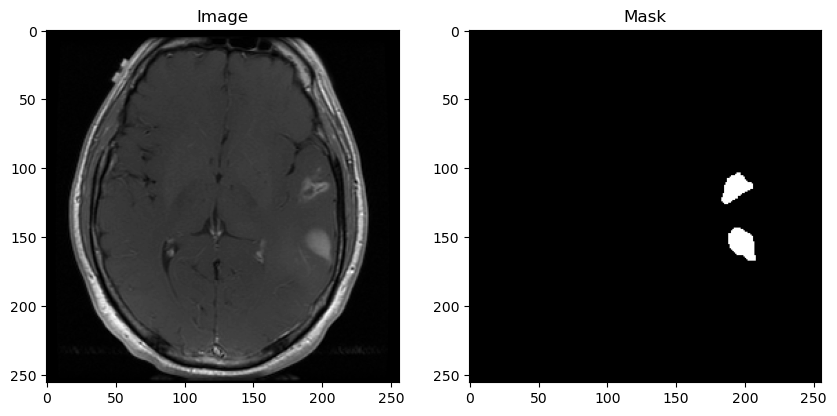

In [5]:
# 显示图像和掩码
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_slice, cmap='gray')
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(image_slice, cmap='gray')
plt.imshow(mask_slice, alpha=1, cmap='gray') 
plt.title('Mask')

plt.show()

# 基于pyRadiomics库的影像组学特征提取

https://github.com/AIM-Harvard/pyradiomics
pyradiomics官网

https://pyradiomics.readthedocs.io/en/latest/index.html
pyradiomics特征与参数详解

+ 目标：从影像获取特征（把影像的感兴趣区域转变成数据）
+ 输入：影像Image+感兴趣区域Mask
+ 核心代码块：pyradiomics特征提取器featureextractor
+ 输出：影像组学特征
+ 备注：核心代码块的参数设置

## 默认参数设置

{
'minimumROIDimensions': 2,
'minimumROISize': None,
'<span class="mark">normalize</span>': False,
'normalizeScale': 1,
'removeOutliers': None,
'<span class="mark">resampledPixelSpacing</span>': None,
'interpolator': 'sitkBSpline',
'preCrop': False,
'padDistance': 5,
'distances': [1],
'force2D': False,
'force2Ddimension': 0,
'resegmentRange': None,
'label': 1,
'additionalInfo': True
}

In [6]:
# 导入库
from radiomics import featureextractor
import pandas as pd
import numpy as np

In [7]:
# 初始化pyRadiomics提取器featureextractor
extractor_default = featureextractor.RadiomicsFeatureExtractor()  #默认参数

In [8]:
# 执行特征提取器
featureVector_def = extractor_default.execute(imageName, maskName)
featureVector_def

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', '3.1.0a2'),
             ('diagnostics_Versions_Numpy', '1.21.6'),
             ('diagnostics_Versions_SimpleITK', '2.1.1'),
             ('diagnostics_Versions_PyWavelet', '1.3.0'),
             ('diagnostics_Versions_Python', '3.7.12'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}),
             ('diag

In [9]:
# 将特征转化为数据框
featureVector_def = pd.DataFrame([featureVector_def])
featureVector_def

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3.1.0a2,1.21.6,2.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},34ebe4422f19a1a59ae841f2e1c5631d829ecd07,3D,"(0.7812499999999999, 0.7812499999999999, 6.499...",...,212.82219286917007,0.005226465338573049,6.500342135438002,0.47533401849948614,5.957877574872169,1.1924195457279245,0.0017238848533998423,1661.405595055446,0.24825221192523386,0.6483520011913105


In [10]:
# diagnostics相关参数
col_diag = featureVector_def.columns.str.contains('diagnostics')
col_diag

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
# 特征个数
original_features_num = np.sum(col_diag==False)
original_features_num

107

## 自定义参数设置

In [12]:
# 导入库
from radiomics import featureextractor
import pandas as pd
import numpy as np

In [13]:
# 设置参数
settings = {}
settings['resampledPixelSpacing'] = [3, 3, 3]
settings['normalize'] = True
settings['binWidth']=5
settings

{'resampledPixelSpacing': [3, 3, 3], 'normalize': True, 'binWidth': 5}

In [14]:
# 将 settings 字典中的每个键值对作为关键字参数传递给 RadiomicsFeatureExtractor 的构造函数
extractor_set = featureextractor.RadiomicsFeatureExtractor(**settings)

In [15]:
featureVector_set = extractor_set.execute(imageName, maskName)
featureVector_set

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', '3.1.0a2'),
             ('diagnostics_Versions_Numpy', '1.21.6'),
             ('diagnostics_Versions_SimpleITK', '2.1.1'),
             ('diagnostics_Versions_PyWavelet', '1.3.0'),
             ('diagnostics_Versions_Python', '3.7.12'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': True,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': [3, 3, 3],
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True,
               'binWidth': 5}),
             ('diagnostics_Configuration_EnabledImageTypes', {'Or

In [16]:
featureVector_set = pd.DataFrame([featureVector_set])
featureVector_set

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3.1.0a2,1.21.6,2.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},34ebe4422f19a1a59ae841f2e1c5631d829ecd07,3D,"(0.7812499999999999, 0.7812499999999999, 6.499...",...,5.040097387196655e-05,5.040097387196655e-05,0.9999999999999993,0.0035460992907801418,32400.0,0.0,1000000.0,0.0,0.0,0.0


In [17]:
#diagnostics相关参数
col_diag = featureVector_set.columns.str.contains('diagnostics')
col_diag

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
# 特征个数
original_features_num = np.sum(col_diag==False)
original_features_num

107

## 自定义提取高阶特征

In [19]:
# 导入库
from radiomics import featureextractor
import pandas as pd
import numpy as np

In [20]:
# 设置参数
settings = {}
settings['resampledPixelSpacing'] = [3, 3, 3]
settings['normalize'] = True
settings['binWidth']=5
settings

{'resampledPixelSpacing': [3, 3, 3], 'normalize': True, 'binWidth': 5}

In [21]:
# 初始化提取器
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)

In [22]:
# 设置要提取的高阶特征
extractor.enableImageTypeByName('Wavelet')
extractor.enableImageTypeByName('LoG', customArgs={'sigma':[2.0,3.0,4.0,5.0]})
extractor.enableImageTypeByName('Square')
extractor.enableImageTypeByName('SquareRoot')
extractor.enableImageTypeByName('Exponential')
extractor.enableImageTypeByName('Logarithm')
extractor.enableImageTypeByName('LBP3D')     
extractor.enableImageTypeByName('Gradient') 

print('Enabled input images:')
for imageType in extractor.enabledImagetypes.keys():
    print('\t' + imageType)

Enabled input images:
	Original
	Wavelet
	LoG
	Square
	SquareRoot
	Exponential
	Logarithm
	LBP3D
	Gradient


In [23]:
featureVector_highorder = extractor.execute(imageName, maskName)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [24]:
featureVector_highorder = pd.DataFrame([featureVector_highorder])
featureVector_highorder

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
0,3.1.0a2,1.21.6,2.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",34ebe4422f19a1a59ae841f2e1c5631d829ecd07,3D,"(0.7812499999999999, 0.7812499999999999, 6.499...",...,5.040097387196655e-05,5.040097387196655e-05,0.9999999999999993,0.0035460992907801418,32400.0,0.0,1000000.0,0.0,0.0,0.0


In [25]:
col_diag = featureVector_highorder.columns.str.contains('diagnostics')
features_num = np.sum(col_diag==False)
features_num

1967

## 基于yaml文件

In [26]:
# 查看影像的切片厚度以选取对应的yaml文件
import SimpleITK as sitk
image = sitk.ReadImage(imageName)

# 获取图像的物理间距，其中包含了切片厚度信息
spacing = image.GetSpacing()

# 切片厚度通常是物理间距的第三个元素（对于3D图像）
slice_thickness = spacing[2]
print(f"Slice Thickness: {slice_thickness} mm")

Slice Thickness: 6.499999999999998 mm


In [27]:
# 导入库
from radiomics import featureextractor
import numpy as np
import pandas as pd

In [28]:
# 读取yaml文件
yaml = r"D:\FJMU_course\Chapter_6\yaml\exampleMR_5mm.yaml"

In [29]:
# conda install PyYAML
import yaml

# 假设你的 YAML 文件路径是 'config.yaml'
yaml_file_path = r"D:\FJMU_course\Chapter_6\yaml\exampleMR_5mm.yaml"

with open(yaml_file_path, 'r') as f:
    cfg = yaml.safe_load(f)

# 打印整个 YAML 文件内容
print(cfg)

{'imageType': {'Original': {}, 'LoG': {'sigma': [3.0, 5.0]}, 'Wavelet': {}}, 'featureClass': {'shape': None, 'firstorder': None, 'glcm': ['Autocorrelation', 'JointAverage', 'ClusterProminence', 'ClusterShade', 'ClusterTendency', 'Contrast', 'Correlation', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'JointEnergy', 'JointEntropy', 'Imc1', 'Imc2', 'Idm', 'Idmn', 'Id', 'Idn', 'InverseVariance', 'MaximumProbability', 'SumEntropy', 'SumSquares'], 'glrlm': None, 'glszm': None, 'gldm': None}, 'setting': {'normalize': True, 'normalizeScale': 100, 'interpolator': 'sitkBSpline', 'resampledPixelSpacing': [3, 3, 3], 'binWidth': 5, 'voxelArrayShift': 300, 'label': 1}}


In [30]:
# 初始化特征提取器
extractor_yaml = featureextractor.RadiomicsFeatureExtractor(yaml_file_path)

In [31]:
# 执行特征提取器
featureVector_yaml = extractor_yaml.execute(imageName, maskName)
featureVector_yaml

OrderedDict([('diagnostics_Versions_PyRadiomics', '3.1.0a2'),
             ('diagnostics_Versions_Numpy', '1.21.6'),
             ('diagnostics_Versions_SimpleITK', '2.1.1'),
             ('diagnostics_Versions_PyWavelet', '1.3.0'),
             ('diagnostics_Versions_Python', '3.7.12'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': True,
               'normalizeScale': 100,
               'removeOutliers': None,
               'resampledPixelSpacing': [3, 3, 3],
               'interpolator': 'sitkBSpline',
               'preCrop': False,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True,
               'binWidth': 5,
               'voxelArrayShift': 300}),
             ('diagnosti

+ 提取的特征，转换成表格形式

In [32]:
featureVector_yaml = pd.DataFrame([featureVector_yaml])
featureVector_yaml

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,wavelet-LLL_gldm_GrayLevelNonUniformity,wavelet-LLL_gldm_GrayLevelVariance,wavelet-LLL_gldm_HighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceEmphasis,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis
0,3.1.0a2,1.21.6,2.1.1,1.3.0,3.7.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [3.0, 5.0]},...",34ebe4422f19a1a59ae841f2e1c5631d829ecd07,3D,"(0.7812499999999999, 0.7812499999999999, 6.499...",...,10.542553191489361,276.692177833107,1829.8067375886526,2.9468085106382977,5195.916666666667,0.006295817220287866,0.004019643686095581,0.7026640070921986,1265.6740814617808,0.003693811213621843


In [33]:
#diagnostics相关参数
col_diag = featureVector_yaml.columns.str.contains('diagnostics')
col_diag

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [34]:
# 总的特征个数：
np.sum(col_diag==False)

960

In [35]:
#shape
col_shape = featureVector_yaml.columns.str.contains('shape')
col_shape

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [36]:
# shape特征个数：
np.sum(col_shape==True)

14

# 批量特征提取

## 导入库

In [37]:
from radiomics import featureextractor
import os
import pandas as pd
import numpy as np
import SimpleITK as sitk
from glob import glob

## 输入文件夹的路径

In [38]:
path_input = r"D:\FJMU_course\Chapter_6\example_multiple"
os.chdir(path_input)
os.getcwd()

'D:\\FJMU_course\\Chapter_6\\example_multiple'

In [39]:
folders = os.listdir(path_input)
folders

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

## 参数设置

In [52]:
settings = {}
settings['resampledPixelSpacing'] = [3, 3, 3]
settings['normalize'] = True
settings['binWidth']=5
settings

{'resampledPixelSpacing': [3, 3, 3], 'normalize': True, 'binWidth': 5}

In [53]:
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)

In [54]:
extractor.enableImageTypeByName('Wavelet')
extractor.enableImageTypeByName('LoG', customArgs={'sigma':[2.0,3.0,4.0,5.0]})
extractor.enableImageTypeByName('Square')
extractor.enableImageTypeByName('SquareRoot')
extractor.enableImageTypeByName('Exponential')
extractor.enableImageTypeByName('Logarithm')
extractor.enableImageTypeByName('LBP3D')     
extractor.enableImageTypeByName('Gradient') 

print('Enabled input images:')
for imageType in extractor.enabledImagetypes.keys():
    print('\t' + imageType)

Enabled input images:
	Original
	Wavelet
	LoG
	Square
	SquareRoot
	Exponential
	Logarithm
	LBP3D
	Gradient


## 循环遍历文件夹

In [43]:
# 初始化一个空字典来暂时存储单个影像的特征值
features_dict = dict()

# 初始化一个空的DataFrame，用于存储所有病例的特征值
df = pd.DataFrame()

for folder in folders:
    print('Processing Folder:', folder)
    
    imageName = glob(os.path.join(path_input, folder, 'T1C.nrrd'))
    maskName = glob(os.path.join(path_input, folder, '*label.nrrd'))
    
    featureVector = extractor.execute(imageName[0], maskName[0])
    
    # 将当前的件夹名作为ID存储在features_dict字典中
    features_dict['ID'] = folder
    
    # 遍历提取出的特征向量中的每个特征
    for key, value in featureVector.items():
        if 'diagnostics' in key: # 忽略所有键中包含'diagnostics'的项
            continue
        
         # 将特征名和特征值存储到features_dict字典中
        features_dict[key] = value
    
    # 将features_dict字典转换成DataFrame，并追加到df DataFrame中
    df = df.append(pd.DataFrame.from_dict(features_dict, orient='index').T, ignore_index=True)

Processing Folder: 01


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 02


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 03


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 04


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 05


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 06


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 07


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 08


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 09


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 10


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [44]:
# 将dataframe的列名设置为字典里面key的特征名称
df.columns = features_dict.keys()

In [45]:
df

,ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
0,01,0.562564,0.399933,26.602469,66.517263,47.43416490252569,63.7808748764079,53.16013544000805,69.06518659932803,14514.75,...,5.040097387196655e-05,5.040097387196655e-05,0.9999999999999993,0.0035460992907801418,32400.0,0.0,1000000.0,0.0,0.0,0.0
1,02,0.853646,0.725398,12.471808,17.193062,18.24828759089466,17.4928556845359,18.973665961010276,22.045407685048602,1794.375,...,0.00019290123456790122,0.00019290123456790122,-3.203426503814917e-16,0.013888888888888888,0.0,0.0,1000000.0,0.0,0.0,0.0
2,03,0.715306,0.608958,20.329144,33.383471,30.886890422961002,33.13608305156178,42.95346318982906,43.05810028322197,8919.0,...,8.54963920522554e-06,8.54963920522554e-06,-3.203426503814917e-16,0.0029239766081871343,0.0,0.0,1000000.0,0.0,0.0,0.0
3,04,0.927673,0.715598,41.558888,58.075761,62.42595614005443,66.06814663663572,68.41052550594829,71.2460525222275,85903.875,...,9.735178798727612e-08,9.735178798727612e-08,-3.203426503814917e-16,0.00031201248049921997,0.0,0.0,1000000.0,0.0,0.0,0.0
4,05,0.826424,0.60761,27.545763,45.334618,44.598206241955516,51.088159097779204,51.264022471905186,56.444663166680336,29679.75,...,8.058043700382596e-07,8.058043700382596e-07,-3.203426503814917e-16,0.0008976660682226212,0.0,0.0,1000000.0,0.0,0.0,0.0
5,06,0.931244,0.717491,31.414795,43.784252,53.16013544000805,56.36488268416781,51.088159097779204,57.07889277132134,35948.25,...,5.495106333055098e-07,5.495106333055098e-07,-3.203426503814917e-16,0.0007412898443291327,0.0,0.0,1000000.0,0.0,0.0,0.0
6,07,0.791574,0.753304,43.549887,57.811833,57.9396237474839,67.4166151627327,63.63961030678928,69.77822009767804,77518.125,...,1.1956482230754368e-07,1.1956482230754368e-07,-3.203426503814917e-16,0.00034578146611341634,0.0,0.0,1000000.0,0.0,0.0,0.0
7,08,0.700488,0.563789,33.626921,59.644478,53.16013544000805,64.89992295835181,59.16924876994806,71.18286310622803,55436.625,...,2.322543184787342e-07,2.322543184787342e-07,-3.203426503814917e-16,0.00048192771084337347,0.0,0.0,1000000.0,0.0,0.0,0.0
8,09,0.519718,0.449947,26.616597,59.154933,42.95346318982906,64.89992295835181,54.74486277268398,65.52098900352466,31195.125,...,7.280224580367855e-07,7.280224580367855e-07,-3.203426503814917e-16,0.0008532423208191126,0.0,0.0,1000000.0,0.0,0.0,0.0
9,10,0.801673,0.654013,35.275342,53.936768,56.04462507680822,57.62811813689564,56.60388679233962,62.42595614005443,53516.25,...,2.490029920199521e-07,2.490029920199521e-07,-3.203426503814917e-16,0.000499001996007984,0.0,0.0,1000000.0,0.0,0.0,0.0


## 保存特征为csv文件

In [46]:
path_output = 'D:\\FJMU_course\\Chapter_6\\example_multiple_features\\example_multiple_features.csv'
df.to_csv(path_output, index=False)

# (*nii.gz)格式特征提取

## 导入库

In [47]:
import SimpleITK as sitk
from glob import glob
import os
import pandas as pd
import numpy as np
from radiomics import featureextractor

## 创建文件夹，设置路径

In [48]:
path_input = r"D:\FJMU_course\Chapter_6\example_multiple"
os.getcwd()
folders = os.listdir(path_input)
folders

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [49]:
# 建立储存新文件的文件夹
path_output = r"D:\FJMU_course\Chapter_6\example_multiple_nii.gz"
try:
    os.mkdir(path_output)
except FileExistsError:
    print('文件准备就绪，开干！')
os.chdir(path_output)

文件准备就绪，开干！


In [50]:
os.getcwd()

'D:\\FJMU_course\\Chapter_6\\example_multiple_nii.gz'

## 格式转换 from (*.nrrd) to (*.nii.gz)

In [55]:
for folder in folders:
    print('Processing Folder:', folder)
    
    # 构建每个病例的输出目录路径
    folder_output_path = os.path.join(path_output, folder)
    
    # 创建输出病例文件夹（如果文件夹已存在则忽略）
    os.makedirs(folder_output_path, exist_ok=True)
   
    # 影像image与对应的mask
    image_input_paths = glob(os.path.join(path_input, folder, 'T1C.nrrd'))
    mask_input_paths = glob(os.path.join(path_input, folder, 'T1Cseg-label.nrrd'))
        
    # 读取图像和掩码
    image = sitk.ReadImage(image_input_paths[0])
    mask = sitk.ReadImage(mask_input_paths[0])
        
    # 构建输出路径
    image_output_path = os.path.join(path_output, folder, 'T1C.nii.gz')
    mask_output_path = os.path.join(path_output, folder, 'T1Cseg-label.nii.gz')
    
    # 写入图像和掩码到nii.gz
    sitk.WriteImage(image, image_output_path)
    sitk.WriteImage(mask, mask_output_path)

Processing Folder: 01
Processing Folder: 02
Processing Folder: 03
Processing Folder: 04
Processing Folder: 05
Processing Folder: 06
Processing Folder: 07
Processing Folder: 08
Processing Folder: 09
Processing Folder: 10


## 提取(*.nii.gz)格式影像组学特征

In [56]:
folders = os.listdir(path_output)

In [57]:
# 初始化一个空字典来暂时存储单个影像的特征值
features_dict = dict()

# 初始化一个空的DataFrame，用于存储所有病例的特征值
df = pd.DataFrame()

for folder in folders:
    print('Processing Folder:', folder)
    
    imageName = glob(os.path.join(path_output, folder, 'T1C.nii.gz'))
    maskName = glob(os.path.join(path_output, folder, 'T1Cseg-label.nii.gz'))
    
    featureVector = extractor.execute(imageName[0], maskName[0])
    
    # 将当前的件夹名作为ID存储在features_dict字典中
    features_dict['ID'] = folder
    
    # 遍历提取出的特征向量中的每个特征
    for key, value in featureVector.items():
        if 'diagnostics' in key: # 忽略所有键中包含'diagnostics'的项
            continue
        
         # 将特征名和特征值存储到features_dict字典中
        features_dict[key] = value
    
    # 将features_dict字典转换成DataFrame，并追加到df DataFrame中
    df = df.append(pd.DataFrame.from_dict(features_dict, orient='index').T, ignore_index=True)

Processing Folder: 01


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 02


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 03


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 04


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 05


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 06


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 07


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 08


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 09


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Processing Folder: 10


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [58]:
# 将dataframe的列名设置为字典里面key的特征名称
df.columns = features_dict.keys()

In [59]:
df

,ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
0,01,0.562564,0.399933,26.602469,66.517263,47.43416490252569,63.7808748764079,53.16013544000805,69.06518659932803,14514.75,...,5.040097387196655e-05,5.040097387196655e-05,0.9999999999999993,0.0035460992907801418,32400.0,0.0,1000000.0,0.0,0.0,0.0
1,02,0.853646,0.725398,12.471808,17.193062,18.24828759089466,17.4928556845359,18.973665961010276,22.045407685048602,1794.375,...,0.00019290123456790122,0.00019290123456790122,-3.203426503814917e-16,0.013888888888888888,0.0,0.0,1000000.0,0.0,0.0,0.0
2,03,0.715306,0.608958,20.329144,33.383471,30.886890422961002,33.13608305156178,42.95346318982906,43.05810028322197,8919.0,...,8.54963920522554e-06,8.54963920522554e-06,-3.203426503814917e-16,0.0029239766081871343,0.0,0.0,1000000.0,0.0,0.0,0.0
3,04,0.927673,0.715598,41.558888,58.075761,62.42595614005443,66.06814663663572,68.41052550594829,71.2460525222275,85903.875,...,9.735178798727612e-08,9.735178798727612e-08,-3.203426503814917e-16,0.00031201248049921997,0.0,0.0,1000000.0,0.0,0.0,0.0
4,05,0.826424,0.60761,27.545763,45.334618,44.598206241955516,51.088159097779204,51.264022471905186,56.444663166680336,29679.75,...,8.058043700382596e-07,8.058043700382596e-07,-3.203426503814917e-16,0.0008976660682226212,0.0,0.0,1000000.0,0.0,0.0,0.0
5,06,0.930652,0.714635,31.264845,43.749394,53.16013544000805,56.36488268416781,51.088159097779204,56.68333088307355,35629.875,...,5.59418965086103e-07,5.59418965086103e-07,-3.203426503814917e-16,0.0007479431563201197,0.0,0.0,1000000.0,0.0,0.0,0.0
6,07,0.791574,0.753304,43.549887,57.811833,57.9396237474839,67.4166151627327,63.63961030678928,69.77822009767804,77518.125,...,1.1956482230754368e-07,1.1956482230754368e-07,-3.203426503814917e-16,0.00034578146611341634,0.0,0.0,1000000.0,0.0,0.0,0.0
7,08,0.700488,0.563789,33.626921,59.644478,53.16013544000805,64.89992295835181,59.16924876994806,71.18286310622803,55436.625,...,2.322543184787342e-07,2.322543184787342e-07,-3.203426503814917e-16,0.00048192771084337347,0.0,0.0,1000000.0,0.0,0.0,0.0
8,09,0.519718,0.449947,26.616597,59.154933,42.95346318982906,64.89992295835181,54.74486277268398,65.52098900352466,31195.125,...,7.280224580367855e-07,7.280224580367855e-07,-3.203426503814917e-16,0.0008532423208191126,0.0,0.0,1000000.0,0.0,0.0,0.0
9,10,0.801673,0.654013,35.275342,53.936768,56.04462507680822,57.62811813689564,56.60388679233962,62.42595614005443,53516.25,...,2.490029920199521e-07,2.490029920199521e-07,-3.203426503814917e-16,0.000499001996007984,0.0,0.0,1000000.0,0.0,0.0,0.0


In [60]:
path_output = 'D:\\FJMU_course\\Chapter_6\\example_multiple_features\\example_multiple_features_nii.gz.csv'
df.to_csv(path_output, index=False)

# 作业

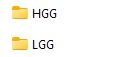

* 批量提取BraTs18 影像组学特征（HGG，LGG各50例）

* 提取结果csv文件发送至邮箱

* 文件命名方式 XXXXXX